<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/Project_comcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMCAST TELECOMMUNICATION COMPLAINTS ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [3]:
data=pd.read_csv("/content/Comcast_telecom_complaints_data.csv")
data.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
data.describe(include="all")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,243582,Comcast,24-06-15,24-Jun-15,2:45:12 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
data.shape

(2224, 11)

In [7]:
data["Date_month_year"]=pd.to_datetime(data["Date_month_year"])    ##changing the datatype of date to default
data["Month"]=data["Date_month_year"].dt.month
data["day"]=data["Date_month_year"].dt.day
data.sort_values("Month")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day
1951,316650,Interrnet Service,06-01-15,2015-01-06,12:41:14 PM,Customer Care Call,Spring City,Pennsylvania,19475,Closed,No,1,6
1415,212595,overcharged,04-01-15,2015-01-04,4:23:47 PM,Internet,Newman,California,95360,Closed,No,1,4
364,316295,Comcast poor service,06-01-15,2015-01-06,10:19:34 AM,Customer Care Call,Ceresco,Michigan,49033,Solved,No,1,6
1410,212228,Comcast Lied About Pricing And Installation,04-01-15,2015-01-04,2:29:41 PM,Customer Care Call,Newark,California,94560,Closed,No,1,4
512,317983,Comcast Internet Service Bad Quality,06-01-15,2015-01-06,10:11:03 PM,Internet,Cupertino,California,95014,Closed,No,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,231374,Fraudulent Billing practices by Comcast,04-12-15,2015-12-04,6:03:51 PM,Customer Care Call,Locust Grove,Virginia,22508,Closed,No,12,4
2076,336982,Comcast monopoly,06-12-15,2015-12-06,1:18:20 PM,Internet,Tukwila,Washington,98188,Solved,No,12,6
1157,231375,Comcast Unfair Billing Practices,04-12-15,2015-12-04,6:07:28 PM,Internet,Littleton,Massachusetts,1460,Closed,No,12,4
1602,337691,Comcast Billing (primary) Service (secondary),06-12-15,2015-12-06,4:29:42 PM,Customer Care Call,Pontiac,Michigan,48342,Solved,No,12,6


In [8]:
x=data["Month"].value_counts()

In [9]:
Month_wise_data=pd.DataFrame(x)
Month_wise_data.rename(columns={"Month":"Frequency"},inplace=True)
Month_wise_data["Months"]=Month_wise_data.index
Month_wise_data.reset_index(drop=True,inplace=True)
Month_wise_data.sort_values("Months",inplace=True)




### Provide a  trend chart for the number of complaints at monthly and daily granularity levels.

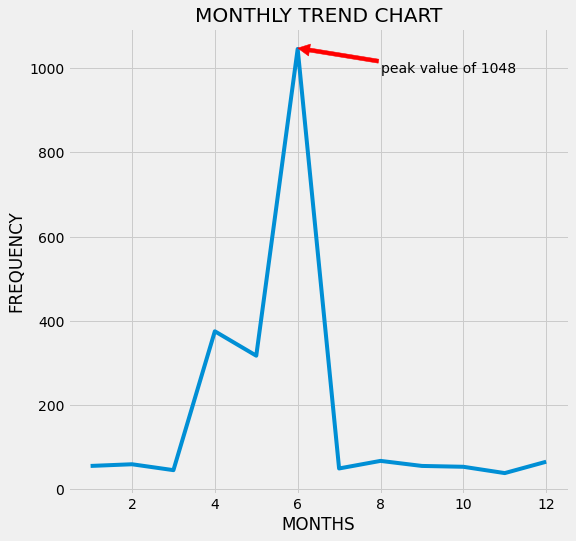

In [10]:
plt.figure(figsize=(8,8))
plt.plot(Month_wise_data["Months"],Month_wise_data["Frequency"])
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")
plt.annotate("peak value of 1048",(6,1048),(8,990),arrowprops={"color":"red"})
plt.show()

In [63]:
day_wise=data.Date_month_year.value_counts()
day_wise_data=pd.DataFrame(day_wise)
day_wise_data.rename(columns={"Date_month_year":"freq"},inplace=True)
day_wise_data["Date_month_year"]=day_wise_data.index
day_wise_data.reset_index(drop=True,inplace=True)
day_wise_data.sort_values("Date_month_year",inplace=True)


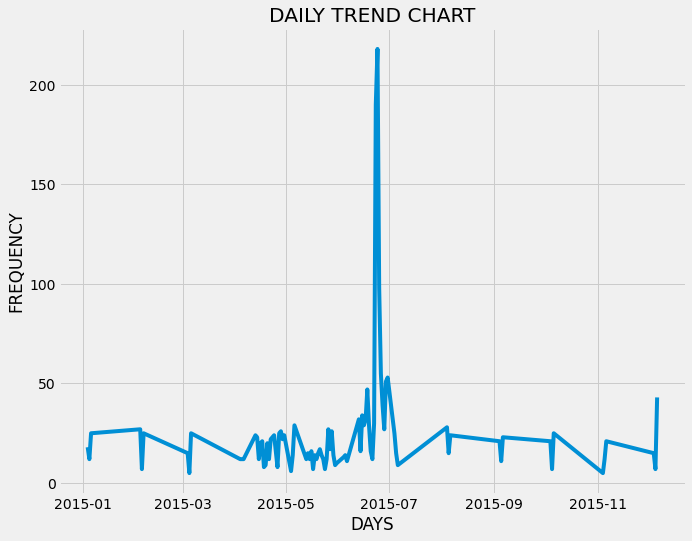

In [62]:
plt.figure(figsize=(10,8))
plt.plot(day_wise_data["Date_month_year"],day_wise_data["freq"])
plt.xlabel("DAYS")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")
plt.show()

In [14]:
data["new_status"]=data["Status"].replace({"Solved":"Closed","Pending":"Open"})


In [15]:
data.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day,new_status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed


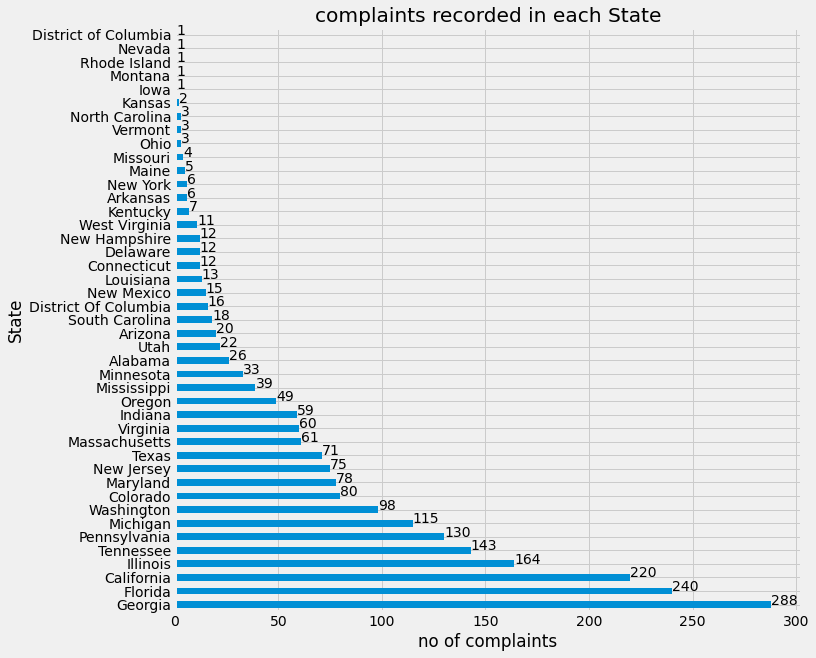

In [16]:

data["State"].value_counts().plot(kind="barh",figsize=(10,10))
plt.xlabel("no of complaints")
plt.ylabel("State")
plt.title("complaints recorded in each State")
for index, value in enumerate(data["State"].value_counts()):
    plt.text(value, index,
             str(value))
plt.show()

### Georgia has recorded the highest number of complaints.

In [17]:
unresolved_complaints=data[data.new_status=="Open"]
statelist=unresolved_complaints["State"].value_counts()


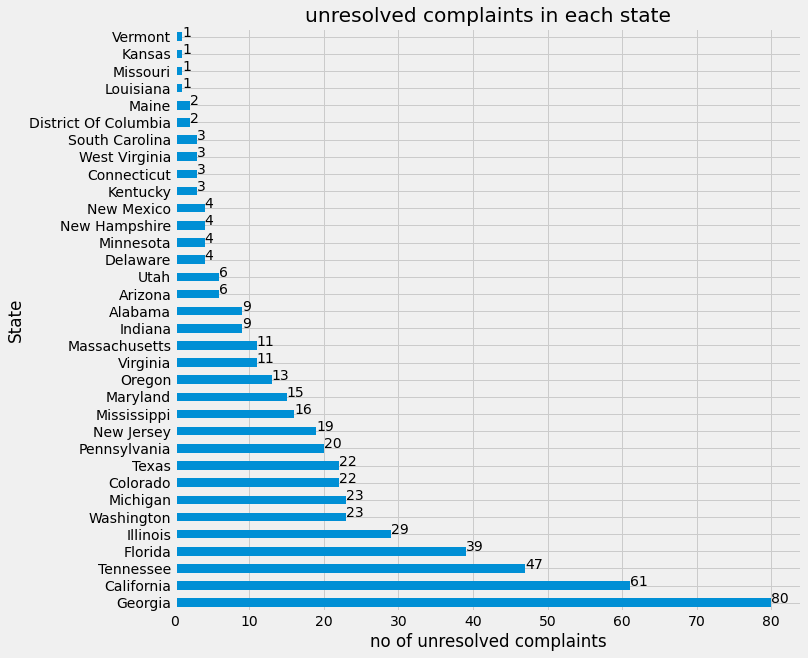

In [18]:
statelist.plot(kind="barh",figsize=(10,10))
plt.xlabel("no of unresolved complaints")
plt.ylabel("State")
plt.title("unresolved complaints in each state")
for index, value in enumerate(statelist):
    plt.text(value, index,
             str(value))
plt.show()


### Georgia has the highest number of unresolved complaints.

In [19]:
resolved_complaints=data[data.new_status=="Closed"]
statelist1=resolved_complaints["State"].value_counts()

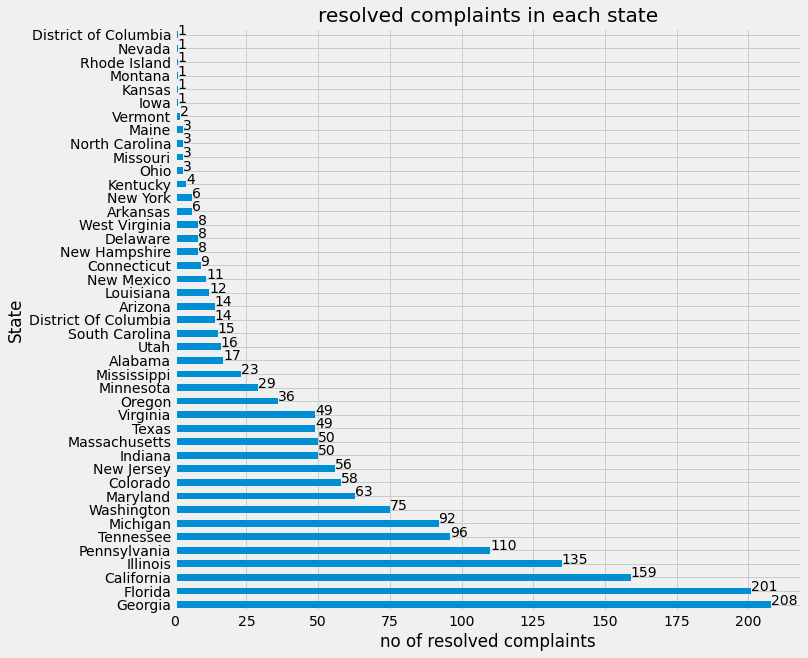

In [20]:
statelist1.plot(kind="barh",figsize=(10,10))
plt.xlabel("no of resolved complaints")
plt.ylabel("State")
plt.title("resolved complaints in each state")
for index, value in enumerate(statelist1):
    plt.text(value, index,
             str(value))
plt.show()


### Georgia has the highest number of resolved complaints.

In [21]:
complain_types=data["Customer Complaint"].value_counts()
complain_type_list=pd.DataFrame(complain_types)
complain_type_list.rename(columns={"Customer Complaint":"count"},inplace=True)
complain_type_list["Customer Complaint"]=complain_type_list.index
complain_type_list.reset_index(drop=True,inplace=True)
complain_type_list.head(10)

,count,Customer Complaint
0,83,Comcast
1,18,Comcast Internet
2,17,Comcast Data Cap
3,13,comcast
4,11,Comcast Data Caps
5,11,Comcast Billing
6,11,Data Caps
7,9,Unfair Billing Practices
8,8,Comcast/Xfinity
9,8,Comcast internet


# Frequency of complaint types

In [22]:
s1=pd.DataFrame(statelist)
s1.rename(columns={"State":"F1"},inplace=True)
s2=pd.DataFrame(statelist1)
s2.rename(columns={"State":"F2"},inplace=True)

In [23]:
statelist3=pd.concat([s1,s2],axis=1)
statelist3.rename(columns={"F1":"open","F2":"closed"},inplace=True)
statelist3["state"]=statelist3.index
statelist3.reset_index(drop=True,inplace=True)
statelist3.head()

,open,closed,state
0,80.0,208,Georgia
1,61.0,159,California
2,47.0,96,Tennessee
3,39.0,201,Florida
4,29.0,135,Illinois


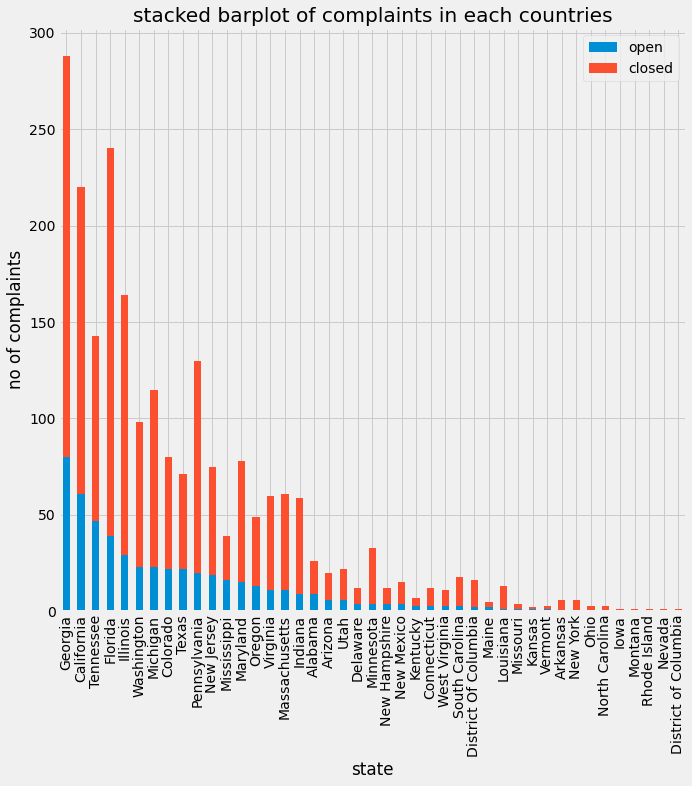

In [24]:
statelist3.plot(x="state",kind="bar",stacked=True,figsize=(10,10))
plt.ylabel("no of complaints")
plt.title("stacked barplot of complaints in each countries")
plt.show()

# ANALYSIS REPORT

## - With the help of  monthly trend chart we can conclude that maximum number of complaints registered in June month.

## - Georgia has the maximum number of complaints registered

## - Georgia has the maximum number of unresolved and resolved complaints

